# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 9304 Афанасьев Андрей, вариант 25.

## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Основные теоретические положения
### Бинарный метод возведения числа в степень:
Двоичное возведение в степень - это метод, который позволят возводить любое число в $n$-ю степень со сложностью $O(log(n))$.

Для любого числа $a$ и чётного числа $n$ выполняется: $a^n = (a^{2})^{n/2} = a^{n/2}*a^{n/2}$.

Если $n$ $mod$ $2$ $=$ $1$, то переходим к чётной степени $n-1$: $a^n = a*a^{n-1}$.

В итоге, когда $n$ чётная, переходим к меньшей степени $n/2$, когда нечётная, то к $n-1$, таким образом поступаем, пока $n \neq 0$.

Количество операций умножений равно $\lambda(n) + \nu(n) -1$, где $\lambda(n) = \lfloor lb(n) \rfloor$ и $\nu(n)$ - количество единиц в бинарном представлении числа.

### Метод множителей:
Если мы умеем вычислять $x^i$ за $n$ операций, а $y^j$ за $m$ операций, то $(x^i)^j = x^{i*j}$ мы сможем вычислить за $n+m$ операций. $i$ - это наименьший простой множитель степени $k$, в которую хотим возвести число. Если же $k$ изначально простая степень, то считаем $x^{k-1}$ и затем домножаем на $x$.


### Определение аддитивной цепочки:

Аддитивной цепочкой для числа ***n $\in \mathbb{N}$*** называется последовательность чисел $1 = a_1, a_2, a_3, ..., a_m = n$, где $a_i = a_j + a_k$, $k \leqslant j < i$, $i = 1...n$. $l(n)$ - минимальная длина аддитивной цепочки.
$\forall n \leqslant 1000$ справедлива рекурентная формула: $$ l(n) = min\{ l(n-1)+1,\; l_n\} - \delta_n,$$ где $\delta_n\in\{0, 1\}$, $l_n = \begin{cases} \infty \text{, если n - простое число}  \\ l(q) + l(\frac{n}{q}) \text{, если q - минимальный простой делитель числа n} \end{cases}$

### Теорема Брауэра

Для некторого $k < log_2 log_2 n$ справедливо неравенство: $l(n) < (1+k^{-1})\cdot\lceil\log_2 n\rceil+2^{k-1}-k+2$

Следствие 1: $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$, при $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$

Следствие 2: Наилучшая верхняя оценка для l(n) имеет вид: $\lambda(n)(1+\cfrac{1}{\lambda(\lambda(n))}+\cfrac{o(\lambda(\lambda(\lambda(n))))}{(\lambda(\lambda(n)))^2})$, при $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$

### Типы шагов аддитивной цепочки

Если $a_i < a_{i+1}$, то равенство $a_i = a_j+a_k$, $i = 1..m$, $0\leqslant k\leqslant j < i$ называется шагом аддитивной цепочки.

Шаги:
- Удвоение, если j=k=i-1 $a_i = 2 * a_{i-1}$
- Звёздный, если j = i-1, k = 0..i-1
- Малый шаг, если $\lambda(a_i) = \lambda(a_{i-1})$

### Алгоритм Брауэра

Алгоритм Брауэра вычисляет n нную стпенень за $\lambda(n)+\frac{(1+o(1))\lambda(n)}{\lambda(\lambda(n))}$ операций.

Для некоторых n, k брауерские цепочки задаются в виде рекурентной формулы: $B_k(n) =\begin{cases}1, 2, 3, ..., 2^k-1\text{, если } n<2^k \\ B_k(q), 2q, 4q, 8q, ..., 2^kq, n,\text{ если } n \geqslant 2^k\ \text{и } q = \lfloor\frac{n}{2^k}\rfloor \end{cases}$

### Звёздная цепочка. Гипотеза Шольца-Брауэра

Звёздная цепочка - цепочка которая содержит в себе только звёздные шаги. $a_i = a_{i-1} + a_k\text{, где } 0\leqslant k\leqslant i-1 $

$l^*(n)$ - длина звёздной цепочки. $l^*(n)\geqslant l(n)$

Гипотеза Шольца-Брауэра: $l^*(2^n-1)\leqslant l^*(n)+n-1$

### Алгоритм дробления вектора индексов

Алгоритм дробления вектора индексов является точным алгоритмом и находит минимальную звёздную цепочку для числа $ n $.

Введём определение вектора индексов: $\exists \text{ звёздная цепочка } l^*(n) = m, {\{a_i\}}_{i=1}^m, a_1 = 1$, тогда можно задать вектор индексов ${\{r_i\}}_{i=1}^{m-1}\text{, где } r_i = \{x: 1\leqslant x\leqslant i\}$. Шаг звёздной цепочки можно переписать следуюшим образом: $a_i = a_{i-1} + a_{r_{i-1}}\text{, где }2\leqslant i\leqslant m$.

Наибольшая звёздная цепочка $S_{max} = \{1, 2, 4, 8, ..., 2^m\}$ соответсвует вектору индексов $r_{max} = \{1, 2, 3, 4, ..., m-1\}$. Наименьшая звёздная цепочка  $S_{min} = \{1, 2, 3, 4, ..., m\}$ соответсвует вектору индексов $r_{min} = \{1, 1, 1, 1, ..., 1\}$.

Будем считать, что $r = {\{r_i\}}_{i=1}^{m-1}$, больше чем $\tilde r = {\{\tilde r_i\}}_{i=1}^{m-1}$, если $r_1 = \tilde r_1$, $r_2 = \tilde r_2$, $r_3 = \tilde r_3$, $r_{i-1} = \tilde r_{i-1}$, ..., $r_i > \tilde r_i$


Нахождение минимальной длины звёздной цепочки происходит с помощью перебора. Вектор индексов разбивается на два вектора: $r = {\{r_i\}}_{i=1}^{q}$ - фиксированный вектор, $\rho = {\{\rho_j\}}_{j=q+1}^{m-1}$ меняющийся вектор. Можно заметить, что наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1, q+2, ..., m-1\}, \ a_{max} = a_{q+1}\cdot2^{m-q}$. Наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{1, 1, ..., 1\}, \ a_{min} = a_{q+1}+m-q$.


#### Алгоритм

Векток индексов разбивается на фиксированный и меняющийся. Вычисляется $a_{min}\text{ и }a_{max}$. Если $n\notin[a_{min}, a_{max}]$, то осуществляется переход к следующему фиксированному вектору. Если для заданной длины не нашлось аддитивной цепочки, то длина цепочки увеличивается. Длина аддитивной цепочки $m\in[ \underline{l}(n),\overline{l}(n)],\text{ где } \underline{l}(n)=\lceil lb(n) \rceil, \overline{l}(n)=\lambda(n)+\nu(n)-1$

## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n \geqslant 30$, для 2-3 значений n (значения n
выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k
, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для n=1..200
путём построения функции l(n)
и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1 < n \leqslant 10$
на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы
1. Бинарный метод и метод множителей.

Реализация бинарного метода:


In [2]:
def binaryPow(x, n):
    if not n:
        return [1, 1]
    elif not x:
        return [0, 1]

    result = 1
    amountOfoperations = -1
    while(n):
        if n & 1:
            result *= x
            n -= 1
        else:
            x *= x # equal to x = x^2
            n >>= 1
        amountOfoperations += 1
    return [result, amountOfoperations]

Реализация метода множителей:

In [3]:
def mmPow(x, n):
    if not n:
        return [1, 1]
    elif not x:
        return [0, 1]

    if n == 1:
        return [x, 0]
        
    multipliers = factor(n)
    if multipliers[0][0] == n:
        res = mmPow(x, n - 1)
        res[0] = res[0] * x
        res[1] = res[1] + 1
        return res
    a = binaryPow(x, multipliers[0][0])
    b = binaryPow(a[0], n // multipliers[0][0])
    return [b[0], a[1] + b[1]]

Результаты бинарного метода и метода множителей:


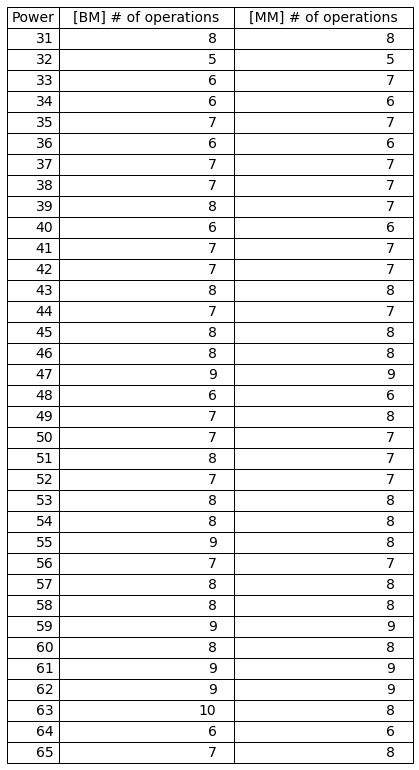

In [4]:
import matplotlib.pyplot as plot 
rows = []
for power in range(31, 66):
    rows.append([power, binaryPow(1, power)[1], mmPow(1, power)[1]])

table = plot.table(cellText=rows, 
                  rowLoc = 'right', 
                  colLabels = ['Power', '[BM] # of operations', '[MM] # of operations'],
                  loc = 'center')

table.set_fontsize(14)
table.scale(1.5, 1.75) 
table.auto_set_column_width([0,1,2])

plot.gca().get_xaxis().set_visible(False)
plot.gca().get_yaxis().set_visible(False)
plot.box(on=None)

print('Результаты бинарного метода и метода множителей:')

### Вывод:
Можно заметить, что метод множителей может быть лучше бинарного метода при $n=2^k - 1$, а иногда может быть хуже при $n=2^k + 1$, в остальных случаях они работают примерно одинаково быстро. 

### Алгоритм Брауэра

Реализация алгоритма Брауэра для вычисления приближённой аддитивной цепочки:

In [5]:
def brauer(n, k, chain):
    if(n < 2**k):
        for i in range(1, 2**k):
            chain.append(i)
    else:
        q = n // (2**k)
        brauer(q, k, chain)
        for i in range(1, k + 1):
            chain.append(2**i * q) 
        chain.append(n)

Результаты алгоритма Брауэра:


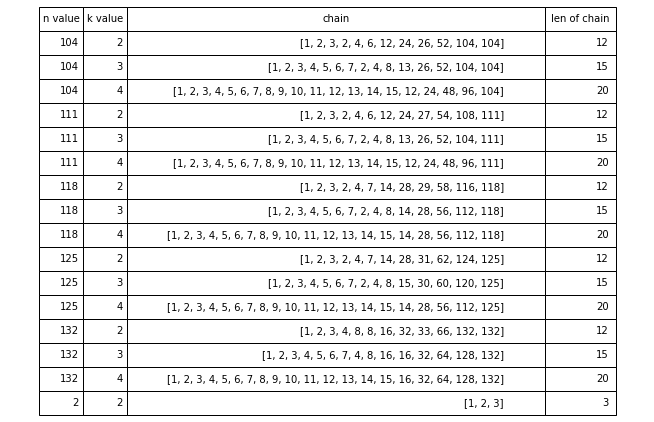

In [6]:
import matplotlib.pyplot as plot 
rows = []
for n in range(104, 133, 7):
    for k in range(2, 5):
        Bn = []
        brauer(n, k, Bn)
        rows.append([n, k, Bn, len(Bn)])
Bn = []
brauer(2, 2, Bn)
rows.append([2, 2, Bn, len(Bn)])

table = plot.table(cellText = rows, 
                  rowLoc = 'right', 
                  colLabels = ['n value', 'k value', 'chain', 'len of chain'],
                  loc = 'center')

table.set_fontsize(14)
table.scale(5, 2) 
table.auto_set_column_width([0,1,3])

plot.gca().get_xaxis().set_visible(False)
plot.gca().get_yaxis().set_visible(False)
plot.box(on=None)

print('Результаты алгоритма Брауэра:')


Кратчайшие аддитивные цепочки:

104: 1, 2, 3, 6, 12, 13, 26, 52, 104; l = 9.

111: 1, 2, 3, 6, 12, 24, 27, 54, 108, 111; l = 10.

118: 1, 2, 3, 6, 7, 14, 28, 56, 59, 118; l = 10.

125: 1, 2, 4, 5, 10, 15, 30, 60, 120, 125; l = 10.

132: 1, 2, 4, 8, 16, 32, 33, 66, 132; l = 9.

2: 1, 2; l = 2.


#### Вывод:

Как можно заметить по таблицам, алгоритм Брауэра не даёт минимальную аддитивную цепочку, что и требовалось ожидать. Наибольшее приближение к минимальной аддитивной цепочке происходит при $k = \lambda(\lambda(n))$. 
С увеличением $k$ длина цепочки становится больше, потому что число $2^k$ увеличивается вслед за $k$.

Можно заметить, что в аддитивных цепочках присутствуют повторяющиеся элементы. Это происходит, когда в цепочку добавляется $2q$, если $q < 2^{k-1}$, или $4q$, если $q < 2^{k-2}, ...$.

Ещё можно заметить неадекватное поведение, когда $n < 2^k - 1$. В таком случае последний элемент цепочки (а может и не только) больше n, так как $n < 2^k - 1$, а $2^k - 1$ по определению алгоритма точно есть в цепочке.

#### Улучшенный алгоритм Брауэра:

In [7]:
def brauerImp(n, k, chain, isFirstStart = true):
    if(n < 2**k):
        for i in range(1, 2**k):
            chain.append(i)
            if n == i and isFirstStart == true:
                break
    else:
        q = n // (2**k)
        brauerImp(q, k, chain, false)
        for i in range(1, k + 1):
            if not q < 2**(k - i):
                chain.append(q * 2**i)
        if n != q * 2**k:
            chain.append(n)

Результаты оптимизированного алгоритма Брауэра:


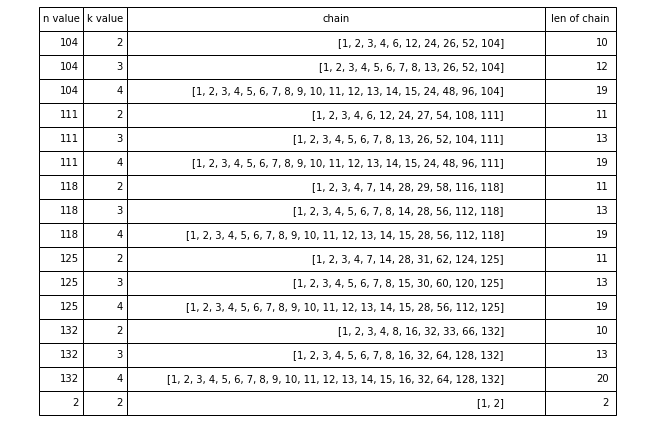

In [8]:
import matplotlib.pyplot as plot 
rows = []
for n in range(104, 133, 7):
    for k in range(2, 5):
        Bn = []
        brauerImp(n, k, Bn)
        rows.append([n, k, Bn, len(Bn)])
Bn = []
brauerImp(2, 2, Bn)
rows.append([2, 2, Bn, len(Bn)])

table = plot.table(cellText = rows, 
                  rowLoc = 'right', 
                  colLabels = ['n value', 'k value', 'chain', 'len of chain'],
                  loc = 'center')

table.set_fontsize(14)
table.scale(5, 2) 
table.auto_set_column_width([0,1,3])

plot.gca().get_xaxis().set_visible(False)
plot.gca().get_yaxis().set_visible(False)
plot.box(on=None)

print('Результаты оптимизированного алгоритма Брауэра:')

#### Вывод по оптимизированному алгоритму:
Как можно заметить по новой таблице, оптимизация исключила все недостатки, выявленные в выводе по предыдущей версии алгоритма. Теперь в среднем длина каждой цепочки сократилась за счет удаления повторений, а неадекватного поведения, когда $n < 2^k - 1$, больше нет.

### Алгоритм дробления вектора индексов

Реализация алгоритма дробления индексов для нахождения минимальной аддитивной цепочки для числа $n$:

In [2]:
import math
import time


def tryGetNextIndexVector(indexVector, lineIndex):
    lenOfIndexVector = len(indexVector)
    for index in range(lenOfIndexVector - 1, lineIndex, -1):
        if indexVector[index] < index + 1:
            indexVector[index] += 1
            for backIndex in range(index + 1, lenOfIndexVector):
                indexVector[backIndex] = 1
            return True
    return False
    

def makeChain(indexVector):
    chain = [1]
    for elementIndex in indexVector:
        chain.append(chain[-1] + chain[elementIndex - 1])
    return chain


def minChain(n):
    lBorders = (math.ceil(math.log(n, 2)), math.floor(math.log(n, 2)) + bin(n).count('1') - 1)
    for lengthOfIndexVector in range(lBorders[0], lBorders[1] + 1):
        if n < lBorders[0] or n > 2**lBorders[1]:
            continue
        indexVector = [1] * lengthOfIndexVector
        lineIndex = (lengthOfIndexVector >> 1) - 1
        chain = makeChain(indexVector)
        aq = chain[lineIndex + 1]

        if chain[-1] == n:
            return chain

        exitFlag = False
        upBorder = aq * 2**(len(indexVector) - (lineIndex + 1))
        while upBorder < n:
            if indexVector[lineIndex] < lineIndex + 1:
                indexVector[lineIndex] += 1
            elif lineIndex == 1:
                    exitFlag = True
                    break
            else:
                lineIndex -= 1
                indexVector[lineIndex] += 1
                indexVector[lineIndex + 1] = 1

            chain = makeChain(indexVector)
            aq = chain[lineIndex + 1]
            upBorder = aq * 2**(len(indexVector) - (lineIndex + 1))
        
        if lineIndex == 0 and exitFlag:
            continue

        for i in range(lineIndex, -1, -1):
            while tryGetNextIndexVector(indexVector, i):
                chain = makeChain(indexVector)
                if chain[-1] == n:
                    return chain

    return []

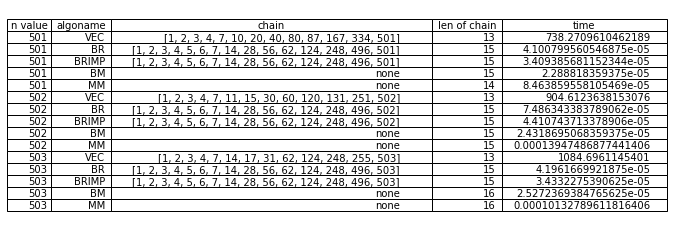

In [10]:
import matplotlib.pyplot as plot 
rows = []
for n in (501, 502, 503):
    start = time.time()
    chain = minChain(n)
    end = time.time()

    rows.append([n, 'VEC', chain, len(chain), end - start])

    start = time.time()
    chain = []
    brauer(n, int(math.log((math.log(n, 2)), 2)), chain)
    end = time.time()

    rows.append([n, 'BR', chain, len(chain), end - start])

    start = time.time()
    chain = []
    brauerImp(n, int(math.log((math.log(n, 2)), 2)), chain)
    end = time.time()

    rows.append([n, 'BRIMP', chain, len(chain), end - start])

    start = time.time()
    ops = binaryPow(1, n)[1]
    end = time.time()

    rows.append([n, 'BM', 'none', ops + 1, end - start])

    start = time.time()
    ops = mmPow(1, n)[1]
    end = time.time()

    rows.append([n, 'MM', 'none', ops + 1, end - start])

table = plot.table(cellText = rows, 
                  rowLoc = 'right', 
                  colLabels = ['n value', 'algoname', 'chain', 'len of chain', 'time'],
                  loc = 'center')

table.set_fontsize(10)
table.scale(1, 1) 
table.auto_set_column_width([0, 1, 2, 3, 4])

plot.gca().get_xaxis().set_visible(False)
plot.gca().get_yaxis().set_visible(False)
plot.box(on=None)
plot.show()

#### Вывод

По предыдущей таблице можно заметить, что нахождение минимальной аддитивной цепочки методом дробления индексов происходит за очень большое время, это связано с переборной природой алгоритма. Также можно заметить, что с увеличением $n$ растёт и время работы алгоритма.

Самым неэффективным алгоритмом оказался неоптимизированный алгоритм Брауэра. Самым точным - метод дробления индексов. Самым эффективным по соотношению результата и времени оказался метод множителей, а оптимизированный алгоритм Брауера оказался эффективнее бинарного метода. Можно сделать вывод, что для быстрых подсчётов подходят приближённые методы вроде оптимизированного алгоритма Брауэра или метода множителей, а для точного подсчёта - метод дробления вектора индексов.

### Проверка следствия теоремы Брауэра:

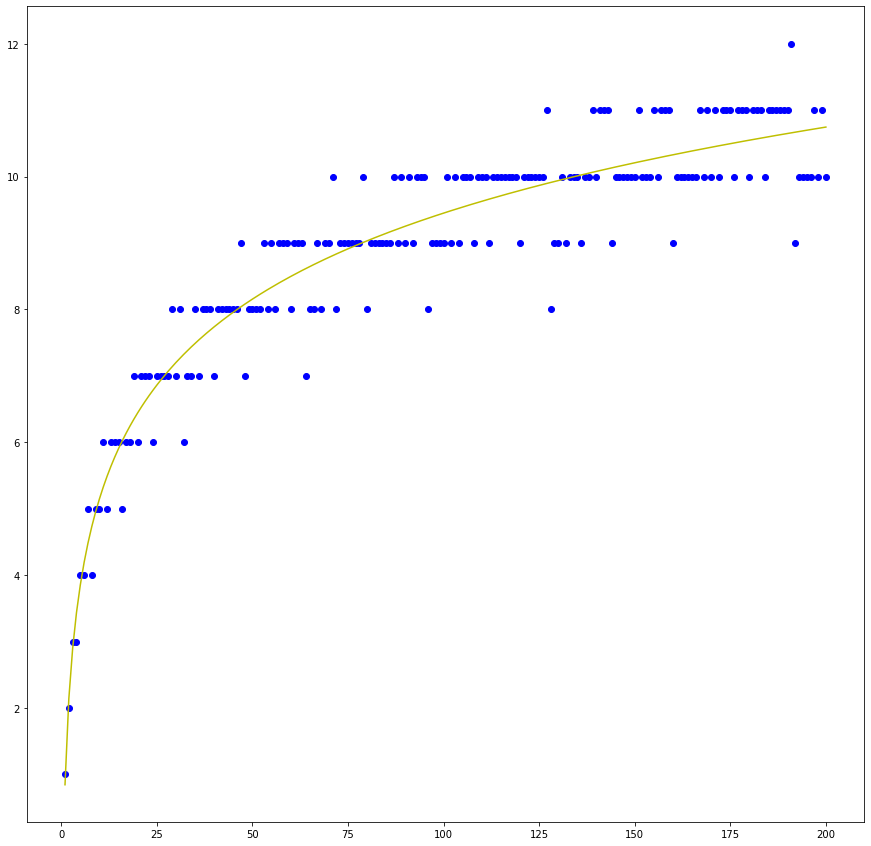

In [13]:
import matplotlib.pyplot as plot 
    
n = []
l = []
for i in range(1, 201):
    n.append(i)
    l.append(len(minChain(i)))

plot.figure(figsize=(15, 15))
plot.scatter(n, l, color = 'r', marker = 'o')

m = matrix([[sum([float((math.log(i)**2)) for i in n]), sum([float(math.log(i)) for i in n])], [sum([float(math.log(i)) for i in n]), len(n)]])
vec = vector([sum([float(l[i] * math.log(n[i])) for i in range(len(n))]), sum(l)])

solution = m.solve_right(vec)
plot.plot(n, [solution[0] * math.log(i) + solution[1] for i in n], color = 'y')
plot.show()

#### Вывод

Как можно понять по графику, функция $l(n)$ апроксимируется логарифмической кривой. Это согласуется со следствием теоремы Брауэра $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$. С увеличением $n$, $l(n)$ будет увеличиваться как логарифмическая функция. Именно поэтому $l(n)$ и $\lambda(n)$ будут эквивалентны на бесконечности.

### Проверка гипотезы Шольца-Брауэра:

In [ ]:
for n in range(2, 11):
    print("n = {}, l*(2^n - 1) = {}, l*(n) + n - 1 = {}".format(n, len(minChain(2**n - 1)), len(minChain(n)) + n - 1))

Таблица значений:

| $n$ | $ l^*(2^n-1) $ | $l^*(n) + n - 1$ |
| :-: | :-: | :-: |
| 2 | 3 | 3 |
| 3 | 5 | 5 |
| 4 | 6 | 6 |
| 5 | 8 | 8 |
| 6 | 9 | 9 |
| 7 | 11 | 11 |
| 8 | 11 | 11 |
| 9 | 13 | 13 |
| 10 | 14 | 14 |

#### Вывод

По полученным данным видно, что гипотеза Шольца-Брауэра справедлива для всех $n \in (1,\;10]$
 

## Вывод по практической работе.
1. Был улучшен навык применения математического пакета SageMath, а также языка программирования Python.

2. Сформировано представление об аддитивных цепочках.

3. Реализованы и применены следующие алгоритмы:
    - Бинарный метод возведения в степень
    - Метод множителей для возведения в степень
    - Алгоритм Брауэра для приближенного построения аддитивной цепочки и его модификация
    - Алгоритм дробления вектора индексов для построения аддитивной цепочки

4. Проверено следствие теоремы Брауэра $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$ на $n=1..200$. 

5. Была проверена гипотеза Шольца-Брауэра $l^*(2^n-1)\leqslant l^*(n)+n-1$ на $n \in (1, 10]$. 

6. Были сделаны выводы по пунктам 3, 4 и 5.